# PageRank简化模型：
出链： 链接出去的链接

入键： 链接进来和链接

一个网页u的影响力=所有入链集合的页面的加权影响务之和

$$PR(u)=\sum_{v\in{B_u}}{\frac{PR(v)}{L(v)}}$$

u:待评估的页面，$B_u$为入链集合

&emsp;&emsp;对于$B_u中的任意页面u，它能给u带来的影响力是其自身的影响力PR(v)除以v页面的出链数量，即页面v把影响力PR(v)平均分配给它的出链。这样统计所有能给u带来链接的页面v，得到的总和即为u的影响力，即为PR(u)

# 转移矩阵：
+ 统计网页对于其他网页的跳转概率

 原因：出链会给被连接的页面赋予影响力，关键在于统计他们的数量

 A-> B, C, D

 B-> A, D

 C-> A

 D-> B, C

$$M=
\left[
 \begin{matrix}
   0   & 1/2 & 1 & 0\\
   1/3 & 0   & 0 & 1/2\\
   1/3 & 0   & 0 & 1/2\\
   1/3 & 1/2 & 0 & 0
 \end{matrix}
\right]$$

+ PageRank过程推导：

 Step1：假设A、B、C、D的初始影响力相同

 Step2：进行一次转移之后，页面的影响力变为：
 
 $$w_0=
\left[
 \begin{matrix}
   1/4\\
   1/4\\
   1/4\\
   1/4
 \end{matrix}
\right]\quad \quad w_1=Mw_0=
\left[
 \begin{matrix}
   0   & 1/2 & 1 & 0\\
   1/3 & 0   & 0 & 1/2\\
   1/3 & 0   & 0 & 1/2\\
   1/3 & 1/2 & 0 & 0
 \end{matrix}
\right]\left[
 \begin{matrix}
   1/4\\
   1/4\\
   1/4\\
   1/4
 \end{matrix}
\right]=\left[
 \begin{matrix}
   9/24\\
   5/24\\
   5/24\\
   5/24
 \end{matrix}
\right]
$$

 Step3：重复迭代Step2进行n次迭代后，直到页面的影响力不再发生变化，也就是页面的影响力收敛，即得到最终的影响力
 
$$
w_n=
\left[
 \begin{matrix}
   0.3333\\
   0.2222\\
   0.2222\\
   0.2222
 \end{matrix}
\right]
$$

# 代码演示：

In [1]:
import numpy as np

a = np.array([
    [0, 1/2, 1, 0],
    [1/3, 0, 0, 1/2],
    [1/3, 0, 0, 1/2],
    [1/3, 1/2, 0, 0]
])

a_leak = np.array([
    [1, 1/2, 0, 0],
    [0, 0, 1, 1/2],
    [0, 0, 0, 1/2],
    [0, 1/2, 0, 0]
])

a_sink = np.array([
    [0, 0, 0, 0],
    [1/3, 0, 0, 1/2],
    [1/3, 1/2, 0, 1/2],
    [1/3, 1/2, 1, 0]
])

b = np.array([1/4, 1/4, 1/4, 1/4])

w = b

def work(a, w):
    for i in range(101):
        w = np.dot(a, w)
        if i % 10 == 0:
            print(i, w)
    

In [2]:
work(a, w)

0 [0.375      0.20833333 0.20833333 0.20833333]
10 [0.33337402 0.22220866 0.22220866 0.22220866]
20 [0.33333337 0.22222221 0.22222221 0.22222221]
30 [0.33333333 0.22222222 0.22222222 0.22222222]
40 [0.33333333 0.22222222 0.22222222 0.22222222]
50 [0.33333333 0.22222222 0.22222222 0.22222222]
60 [0.33333333 0.22222222 0.22222222 0.22222222]
70 [0.33333333 0.22222222 0.22222222 0.22222222]
80 [0.33333333 0.22222222 0.22222222 0.22222222]
90 [0.33333333 0.22222222 0.22222222 0.22222222]
100 [0.33333333 0.22222222 0.22222222 0.22222222]


# Rank Leak 等级泄露

+ 一个网页没有出链，就像是一个黑洞一样，吸收了别人的影响力而不释放（结点上需要有个圈），最终会导致其它网页的PR值为0，如a_leak1；


In [3]:
work(a_leak, w)

0 [0.375 0.375 0.125 0.125]
10 [0.96154785 0.01818848 0.00817871 0.01208496]
20 [9.97502208e-01 1.19531155e-03 5.15580177e-04 7.86900520e-04]
30 [9.99837939e-01 7.75695080e-05 3.35121294e-05 5.09790843e-05]
40 [9.99989486e-01 5.03197987e-06 2.17403760e-06 3.30752403e-06]
50 [9.99999318e-01 3.26449911e-07 1.41039623e-07 2.14574957e-07]
60 [9.99999956e-01 2.11783827e-08 9.14992543e-09 1.39205105e-08]
70 [9.99999997e-01 1.37394397e-09 5.93599852e-10 9.03090768e-10]
80 [1.00000000e+00 8.91343815e-11 3.85096895e-11 5.85878602e-11]
90 [1.00000000e+00 5.78257786e-12 2.49830957e-12 3.80087748e-12]
100 [1.00000000e+00 3.75143756e-13 1.62077409e-13 2.46581281e-13]



# Rank Sink 等级沉没

+ 一个网页只有出链，没有入链，最终会导致这个网页的PR值为0，如a_sink。


In [4]:
work(a_sink, w)

0 [0.         0.20833333 0.33333333 0.45833333]
10 [0.         0.22220866 0.33333333 0.44445801]
20 [0.         0.22222221 0.33333333 0.44444446]
30 [0.         0.22222222 0.33333333 0.44444444]
40 [0.         0.22222222 0.33333333 0.44444444]
50 [0.         0.22222222 0.33333333 0.44444444]
60 [0.         0.22222222 0.33333333 0.44444444]
70 [0.         0.22222222 0.33333333 0.44444444]
80 [0.         0.22222222 0.33333333 0.44444444]
90 [0.         0.22222222 0.33333333 0.44444444]
100 [0.         0.22222222 0.33333333 0.44444444]


# PageRank随机浏览模型

+ 假设场景：用户并不都是按照跳转连接的方式来上网，还有一种可能是不论当前处于哪个页面，都有概率访问到其他任务的页面。

+ 引入阻尼因子：d，通常取值为0.85（默认经验值）

$$PR(u)=\frac{1-d}{N}+d\sum_{v\in{B_u}}{\frac{PR(v)}{L(v)}}$$

In [5]:
def random_work(a, w, n):
    d = 0.85
    for i in range(101):
        w = (1 - d) / n + d * np.dot(a, w)
        if i % 10 == 0:
            print(w)

In [6]:
random_work(a, w, 4)

[0.35625    0.21458333 0.21458333 0.21458333]
[0.3245675  0.22514417 0.22514417 0.22514417]
[0.3245614 0.2251462 0.2251462 0.2251462]
[0.3245614 0.2251462 0.2251462 0.2251462]
[0.3245614 0.2251462 0.2251462 0.2251462]
[0.3245614 0.2251462 0.2251462 0.2251462]
[0.3245614 0.2251462 0.2251462 0.2251462]
[0.3245614 0.2251462 0.2251462 0.2251462]
[0.3245614 0.2251462 0.2251462 0.2251462]
[0.3245614 0.2251462 0.2251462 0.2251462]
[0.3245614 0.2251462 0.2251462 0.2251462]


In [7]:
random_work(a_leak, w, 4)

[0.35625 0.35625 0.14375 0.14375]
[0.66697137 0.15021008 0.08105386 0.10176469]
[0.67062425 0.148495   0.08026508 0.10061567]
[0.67067101 0.14847262 0.08025544 0.10060093]
[0.6706716  0.14847234 0.08025532 0.10060074]
[0.67067161 0.14847233 0.08025532 0.10060074]
[0.67067161 0.14847233 0.08025532 0.10060074]
[0.67067161 0.14847233 0.08025532 0.10060074]
[0.67067161 0.14847233 0.08025532 0.10060074]
[0.67067161 0.14847233 0.08025532 0.10060074]
[0.67067161 0.14847233 0.08025532 0.10060074]


In [8]:
random_work(a_sink, w, 4)

[0.0375     0.21458333 0.32083333 0.42708333]
[0.0375     0.22514417 0.32083333 0.4165225 ]
[0.0375     0.2251462  0.32083333 0.41652047]
[0.0375     0.2251462  0.32083333 0.41652047]
[0.0375     0.2251462  0.32083333 0.41652047]
[0.0375     0.2251462  0.32083333 0.41652047]
[0.0375     0.2251462  0.32083333 0.41652047]
[0.0375     0.2251462  0.32083333 0.41652047]
[0.0375     0.2251462  0.32083333 0.41652047]
[0.0375     0.2251462  0.32083333 0.41652047]
[0.0375     0.2251462  0.32083333 0.41652047]


# PageRank影响力的应用
+ 社交网络领域
 + 如何计算博主影响力（粉丝数=影响力么？）相当粉丝PR高->博主PR高，10万粉丝的影响力可能会比100万僵尸粉的影响力高
 + 如果计算职场影响力（脉脉的影响力计算）与影响力高的打交道，你的影响力也会高
+ 生物领域
 + 基因、蛋白研究，通过PageRank确定七个与遗传有关的肿瘤基因
+ 推荐系统
 + 用户行为转化为图的形式，通过PageRank生成所有物品i的影响力并比高到低生成排序列表
 + 对用户u进行推荐，转化为计算用户u和与所有物品i之间的相关性，取与用户没有直接边相连的物品，按照相关性的高低生成推荐列表
+ 交通网络
 + 预测城市的交通流量和人流动向
 

# PageRank工具使用
+ igraph: 处理复杂网络问题，提供Python,R,C语言接口
 + 性能强大，效率比NetworkX高
+ NetworkX：基于Python的复杂网络库
 + 对于Python使用者友好

## 使用networkX计算节点的pagerank

In [9]:
import networkx as nx
# 创建有向图
G = nx.DiGraph()
# 有向图之间边的关系
edges = [("A", "B"), ("A", "C"), ("A", "D"), ("B", "A"), ("B", "D"), ("C", "A"), ("D", "B"), ("D", "C")]

for edge in edges:
    G.add_edge(edge[0], edge[1])
pagerank_list = nx.pagerank(G, alpha=1)  #alpha为阻尼因子，默认0.85,经典模型为1
print("pagerank值是：", pagerank_list)

pagerank值是： {'A': 0.33333396911621094, 'B': 0.22222201029459634, 'C': 0.22222201029459634, 'D': 0.22222201029459634}


+ import networkx as nx
+ 图的创建
 + 无向图：使用nx.Graph()来创建
 + 有向图：使用nx.DiGraph()来创建
+ 节点的增加、删除和查询
 + 添加节点：使用G.add_node("A")，也可以使用G.add_nodes_from(['B','C','D','E'])
 + 删除节点：使用G.remove_noce(node)，也可以使用G.remove_nodes_from(['B','C','D','E'])
 + 节点查询：G.nodes()获取图中所有节点，G.nodes['A']获取A节点信息，G['A']获取A节点相关边的信息，G.number_of_nodes()获取图中节点的个数
+ 边的增加
 + G.add_edge("A", "B")添加指定的从A到B的边
 + G.add_edges_from从边集合中添加
 + G.add_weighted_edges_from从带有权重的边的集合中添加参数为1个或多个三元组(u,v,w)作为参数，u、v、w分别代表起点，终点和权重
+ 边的删除
 + G.remove_edge， G.remove_edges_from
+ 边的查询
 + G.edges{}获取图中所有边；G.number_of_edges()获取图中边的个数

## NetworkX的可视化布局：
+ spring_layout: 中心放射状
+ circular_layout：在一个圆环上均匀分布节点
+ random_layout：随机分布节点
+ shell_layout：节点都在同心圆上

# 使用PageRank分析邮件往来的关键人物
+ 数据集：https://github.com/cystanford/PageRank (希拉里邮件丑闻)包括了9306邽邮件和513个人名。
+ Emails.csv：记录了所有公开邮件的内容，发送者和接受者的信息。
+ Persons.csv：统计了邮件中所有人物的姓名及对应的ID。
+ Aliases.csv：因为姓名存在别名的情况，为了将邮件中的人物进行统一，我们还需要用Aliases文件来查询别名和人物的对应关系。

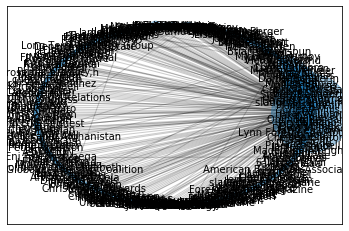

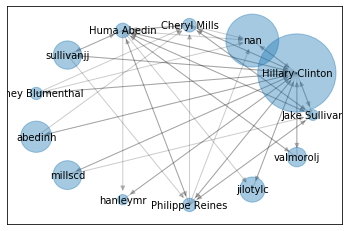

In [10]:
# -*- coding: utf-8 -*-
# 用PageRank挖掘希拉里邮件中的重要任务关系
import pandas as pd
import networkx as nx
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

# 数据加载
emails = pd.read_csv("./HillaryPageRank/Emails.csv")
# 读取别名文件
file = pd.read_csv("./HillaryPageRank/Aliases.csv")
aliases = {}
for index, row in file.iterrows():
    aliases[row['Alias']] = row['PersonId']
# 读取人名文件
file = pd.read_csv("./HillaryPageRank/Persons.csv")
persons = {}
for index, row in file.iterrows():
    persons[row['Id']] = row['Name']

# 针对别名进行转换
def unify_name(name):
    # 姓名统一小写
    name = str(name).lower()
    # 去掉，和@后面的内容
    name = name.replace(",","").split("@")[0]
    # 别名转换
    if name in aliases.keys():
        return persons[aliases[name]]
    return name

# 画网络图
def show_graph(graph):
    # 使用Circular Layout布局，圆环上均匀分布节点
    positions = nx.circular_layout(graph)
    # 设置网格图中的节点大小，大小与pagerank值相关，因为pagerank值很小所以需要*20000
    nodesize = [x['pagerank']*20000 for v,x in graph.nodes(data=True)]
    # 设置网络图中的边长度
    edgesize = [np.sqrt(e[2]['weight']) for e in graph.edges(data=True)]
    # 绘制节点
    nx.draw_networkx_nodes(graph, positions, node_size=nodesize, alpha=0.4)
    # 绘制边
    nx.draw_networkx_edges(graph, positions, edge_size=edgesize, alpha=0.2)
    # 绘制节点的label
    nx.draw_networkx_labels(graph, positions, font_size=10)
    # 输出希拉里邮件中的所有人物关系图
    plt.show()
    
# 将寄件人和收件人的姓名进行规范化
emails.MetadataFrom = emails.MetadataFrom.apply(unify_name)
emails.MetadataTo = emails.MetadataTo.apply(unify_name)

# 设置边的权重等于发邮件的次数
edges_weights_temp = defaultdict(list)
for row in zip(emails.MetadataFrom, emails.MetadataTo, emails.RawText):
    temp = (row[0], row[1])
    if temp not in edges_weights_temp:
        edges_weights_temp[temp] = 1
    else:
        edges_weights_temp[temp] = edges_weights_temp[temp] + 1
        
# 转化格式 (from, to), weight => (from, to, weight)
edges_weights = [(key[0], key[1], val) for key, val in edges_weights_temp.items()]

# 创建一个有向图
graph = nx.DiGraph()
# 设置有向图中的路径及权重(from, to, weight)
graph.add_weighted_edges_from(edges_weights)
# 计算每个节点（人）的PR值，并作为节点的pagerank属性
pagerank = nx.pagerank(graph)
# 获取每个节点的pagerank数值
pagerank_list = {node: rank for node, rank in pagerank.items()}
# 将pagerank数值作为节点的属性
nx.set_node_attributes(graph, name = 'pagerank', values = pagerank_list)
# 画网络图
show_graph(graph)

# 将完整的图谱进行精简
# 设置PR值的阀值，筛选大于阀值的重要核心节点
pagerank_threshold = 0.005
# 复制一份计算好的网络图
small_graph = graph.copy()
# 剪掉PR值小于pagerank_threshold的节点
for n, p_rank in graph.nodes(data=True):
    if p_rank['pagerank'] < pagerank_threshold:
        small_graph.remove_node(n)
# 画网络图
show_graph(small_graph)


# PageRank相关算法

PageRank不仅仅是一个算法，而是一种思想：
+ TextRank算法 
+ EdgeRank算法
+ PersonalRank算法----推荐系统

## TextRank算法
一种用于文本的基于因素的排序算法
+ 根据词之间的共现关系构造风络
+ 构造的网络中的边是无向有权边
+ 什么是分词和词性
 + 文本：土耳其国防部9日晚宣布，土军队已对叙利亚北部的库尔德武装展开军事行动。
 + 进行分词：seg_list = jieba.cut(sentence, cut_all=False)
 + 获取词性：words = pseg.cut(sentence)
+ TextRank算法
 + Step1. 进行分词和词性标注，将单词添加到图中
 + Step2. 出现在一个窗口中的词形成一条边
 + Step3. 基于PageRank原理进行迭代（20-30次）
 + Step4. 顶点（词）按照分数进行排序，可以筛选指定的词性

$$PR(V_i)=\frac{1-d}{N}+d\sum_{V_j\in{In(V_i)}}{\frac{PR(V_j)}{|Out(V_j)|}}$$

$$PR(V_i)=\frac{1-d}{N}+d\sum_{V_j\in{In(V_i)}}{\frac{W_{ij}}{\sum_{V_k\in{Out(V_j)}}{W_{jk}}}}PR(V_j)$$

  $W_{ij}$：单词i和j之间的权重

  节点的权重不仅依赖于入度，还依赖于入度节点的权重


### 1. jieba中使用TextRank提取关键词

+ jieba.analyse.textrank(string, topK=20, withWeight=True, allowPOS=())

 + string： 待处理语句
 + topK： 输出topK个词，默认20
 + withWeight：是否返回权重值，默认false
 + allowPOS：是否仅返回指定类型，默认为空
 
### 2. jieba中使用TF-IDF提取关键词

+ jieba.analyse.extract_tags(sentence, topK=20, withWeight=True, allowPOS=())

+ 效果好于TextRank，考虑了IDF逆向文件频率(Inverse Document Frequency)的情况，而TextRank倾向使用频繁词
 + IDF的主要思想是：如果包含词条t的文档越少，也就是n越小，IDF越大，则说明词条t具有很好的类别区分能力。
 + IDF不光和词频有关，还和稀有程度有关

+ 效率高于TextRank，TextRank基于图的计算和迭代较慢

### 3. textrank4zh工具

+ TextRank除了可以找到关键词，还可以生成摘要（关键句子）
+ 依赖分词，分词提取结果及TextRank结果与jieba存在差异

```
 from textrank4zh import TextRank4Keyword, TextRank4Sentence
 # 输出关键词，设置文本小写，容器为2
 tr4w = TextRank4Keyword()
 tr4w.analyze(text=text, lower=True, window=2)
 print('关键词：')
 for item in tr4w.get_keywords(20, word_min_len=1):
     print(item.word, item.weight)
```

### 4. TextRank生成摘要的原理

+ 每个句子作为图中的节点
+ 如果两个句子相似，则节点之间存在在一条无向有权边
+ 相似度=同时出现在两个句子中的单词的个数/句子中单词个数求对数之和
 + 分母使用对数可以降低长句在相似度计算上的优势

In [16]:
# -*- coding: utf-8 -*-
import jieba
import jieba.analyse
import jieba.posseg as pseg

#sentence = '土耳其国防部9日晚宣布，土军队已对叙利亚北部的库尔德武装展开军事行动。分析人士认为，此次行动并非土方突然之举，而是其在美国宣布从叙相关区域撤军后的必然选项。行动能否实现土所期待的清除叙库尔德武装、解决叙难民安置问题难以预料。但可以确定的是，此举势必会给当地民众带来灾难，会给叙局势乃至地区局势带来严重影响。土国防部表示，作为“和平之泉”军事行动的一部分，土军队已开始在叙利亚北部幼发拉底河以东地区发动地面进攻。土总统埃尔多安当日在社交媒体上发布了军事行动开始的消息，称“和平之泉”军事行动的目的是防止库尔德“恐怖分子”在土南部边境线上建立起一道“恐怖主义走廊”，并促使叙利亚难民重返家园。长期以来，土耳其都视叙库尔德武装为恐怖组织，欲将其清除。但美国却视这一武装为反恐作战合作伙伴，这让土耳其在采取行动时颇有顾忌。美土于8月曾同意在叙东北部建立一个“安全区”，隔离土边境和叙东北部的库尔德武装力量，但两国在“安全区”的范围和管理等方面迟迟无法达成一致。'
sentence = '土耳其国防部9日晚宣布，土军队已对叙利亚北部的库尔德武装展开军事行动。'

# 获取分词
seg_list = jieba.cut(sentence, cut_all=False)
print(' '.join(seg_list))
# 获取分词和词性
words = pseg.cut(sentence)
for word, flag in words:
    print('%s - %s' % (word, flag))
    
# 通过TF-IDF获取关键词
keywords = jieba.analyse.extract_tags(sentence, topK=20, withWeight=True, allowPOS=('n','nr','ns'))
for item in keywords:
    print(item[0], item[1])
print('-'*100)

# 基于TextRank算法的关键词抽取
#keywords = jieba.analyse.textrank(sentence, topK=20, withWeight=True, allowPOS=('ns','n','vn','v'))
keywords = jieba.analyse.textrank(sentence, topK=20, withWeight=True, allowPOS=('n', 'ns'))
#keywords = jieba.analyse.textrank(sentence, topK=20, withWeight=True)
print(keywords)


土耳其 国防部 9 日晚 宣布 ， 土 军队 已 对 叙利亚 北部 的 库尔德 武装 展开 军事行动 。 分析 人士 认为 ， 此次 行动 并非 土方 突然 之 举 ， 而是 其 在 美国 宣布 从 叙 相关 区域 撤军 后 的 必然 选项 。 行动 能否 实现 土所 期待 的 清除 叙 库尔德 武装 、 解决 叙 难民 安置 问题 难以预料 。 但 可以 确定 的 是 ， 此举 势必会 给 当地 民众 带来 灾难 ， 会 给 叙 局势 乃至 地区 局势 带来 严重 影响 。 土 国防部 表示 ， 作为 “ 和平 之泉 ” 军事行动 的 一部分 ， 土 军队 已 开始 在 叙利亚 北部 幼发拉底河 以东 地区 发动 地面 进攻 。 土 总统 埃 尔多 安 当日 在 社交 媒体 上 发布 了 军事行动 开始 的 消息 ， 称 “ 和平 之泉 ” 军事行动 的 目的 是 防止 库尔德 “ 恐怖分子 ” 在 土 南部 边境线 上 建立 起 一道 “ 恐怖主义 走廊 ” ， 并 促使 叙利亚 难民 重返家园 。 长期以来 ， 土耳其 都 视 叙 库尔德 武装 为 恐怖组织 ， 欲 将 其 清除 。 但 美国 却视 这 一 武装 为 反恐 作战 合作伙伴 ， 这 让 土耳其 在 采取行动 时 颇 有 顾忌 。 美土于 8 月 曾 同意 在 叙 东北部 建立 一个 “ 安全区 ” ， 隔离 土 边境 和 叙 东北部 的 库尔德 武装力量 ， 但 两国 在 “ 安全区 ” 的 范围 和 管理 等 方面 迟迟 无法 达成 一致 。
土耳其 - ns
国防部 - nt
9 - m
日晚 - t
宣布 - v
， - x
土 - zg
军队 - n
已 - d
对 - p
叙利亚 - ns
北部 - f
的 - uj
库尔德 - nrt
武装 - n
展开 - v
军事行动 - n
。 - x
分析 - vn
人士 - n
认为 - v
， - x
此次 - r
行动 - vn
并非 - c
土方 - n
突然 - ad
之 - u
举 - v
， - x
而是 - c
其 - r
在 - p
美国 - ns
宣布 - v
从 - p
叙 - ns
相关 - v
区域 - n
撤军 - v
后 - f
的 - uj
必然 - d
选项 - n
。 - x
行动 - vn
能否 - v


In [2]:
#-*- encoding:utf-8 -*-
from textrank4zh import TextRank4Keyword, TextRank4Sentence

text = '土耳其国防部9日晚宣布，土军队已对叙利亚北部的库尔德武装展开军事行动。分析人士认为，此次行动并非土方突然之举，而是其在美国宣布从叙相关区域撤军后的必然选项。行动能否实现土所期待的清除叙库尔德武装、解决叙难民安置问题难以预料。但可以确定的是，此举势必会给当地民众带来灾难，会给叙局势乃至地区局势带来严重影响。土国防部表示，作为“和平之泉”军事行动的一部分，土军队已开始在叙利亚北部幼发拉底河以东地区发动地面进攻。土总统埃尔多安当日在社交媒体上发布了军事行动开始的消息，称“和平之泉”军事行动的目的是防止库尔德“恐怖分子”在土南部边境线上建立起一道“恐怖主义走廊”，并促使叙利亚难民重返家园。长期以来，土耳其都视叙库尔德武装为恐怖组织，欲将其清除。但美国却视这一武装为反恐作战合作伙伴，这让土耳其在采取行动时颇有顾忌。美土于8月曾同意在叙东北部建立一个“安全区”，隔离土边境和叙东北部的库尔德武装力量，但两国在“安全区”的范围和管理等方面迟迟无法达成一致。'

# 输出关键词，设置文本小写，容器为2
tr4w = TextRank4Keyword()
tr4w.analyze(text=text, lower=True, window=2)
print('关键词：')
for item in tr4w.get_keywords(20, word_min_len=1):
    print(item.word, item.weight)
    
# 输出重要的句子
tr4s = TextRank4Sentence()
tr4s.analyze(text=text, lower=True, source='all_filters')
print('摘要：')
# 重要性较高的三个句子
for item in tr4s.get_key_sentences(num=3):
    # index 是语句在文本中位置，weight表示权重
    print(item.index, item.weight, item.sentence)

关键词：
土 0.042379195054714866
叙 0.039590539492346324
军事行动 0.02749413349232927
土耳其 0.023338347066152645
难民 0.02255149649387114
武装 0.02188669100703704
宣布 0.02155825665170464
美国 0.01893835927275734
人士 0.018865484735342414
安全区 0.018401768186738596
带来 0.0172058324374837
当日 0.01678404155184341
社交 0.016784041551843407
和平 0.016302507124455645
局势 0.016184022145912608
国防部 0.016132473667972203
能否 0.014758225625272913
走廊 0.01452798601585652
管理 0.014466391909541108
地面 0.01441900373174741
摘要：
5 0.13047221409423135 土总统埃尔多安当日在社交媒体上发布了军事行动开始的消息，称“和平之泉”军事行动的目的是防止库尔德“恐怖分子”在土南部边境线上建立起一道“恐怖主义走廊”，并促使叙利亚难民重返家园
0 0.12176046334244907 土耳其国防部9日晚宣布，土军队已对叙利亚北部的库尔德武装展开军事行动
2 0.12097306136967419 行动能否实现土所期待的清除叙库尔德武装、解决叙难民安置问题难以预料


## EdgeRank算法

2017年底，微博采用了类似FaceBook的EdgeRank算法

权重高低按：

+ 粉丝亲密底
+ 内容质量
+ 原创程度等来区分

结果：微博按照上面算法调整，企业帐号100万真实粉丝的账号，阅读量不到10万，企业还是需要另外投广告，增加微博收入

## PersonalRank算法

基于图的推荐算法

+ 将用户行为转化为图模型
 + 用户u在左边，item节点在右边，组成一个二部无向图
+ 哪些不与用户u相连的item节点，对用户u的影响力大？
 + 从用户u对应的节点开始游走
 + PageRank随机模型改成以(1-d)的概率固定从u重新开始
 + d的概率继续游走
 + 当收敛的时候，计算item节点影响力排名，即为用户u感兴趣的item
 
$$PR(V_i)=\frac{1-d}{N}+d\sum_{V_j\in{In(V_i)}}{\frac{PR(V_j)}{|Out(V_j)|}}$$
$$PR(V_i)=(1-d)r_i+d\sum_{V_j\in{In(V_i)}}{\frac{PR(V_j)}{|Out(V_j)|}} \ \ \ \ \  r_i=
\begin{cases}
1 & i=u \\
0 & i\ne{u}
\end{cases}
$$

即将随机因子(1-d)全部给用户u，其它的用户u都为0


# 小节Summary

经典的模型往往很简单，但影响力巨大

+ 可以衍生出很多相关/改进模型
+ PageRank提出了一个经典的基于图论的影响力模型
+ Apriori提出了Transaction中的频繁项集，关联规则发现模型

如何将工程转化为模型

+ 关联性：能否转化为图论，能否看成Transaction
+ 需求点：影响力排序，频繁项集，关联规则

# 图论工具的作用

如果我们把图看成工具的话，它可以满足我们很多需求：

+ 节点影响力：PageRank
+ 社区发现：LPA
+ 最短路徑：Dijkstra，Floyd

节点可以是任何事物：words，sentences，images，users，items


# 社区发现

什么是社区发现

+ 现实中存在着各种网络：社交网络、交通网络、交易网络、食物链，将这些行为转化为图的网络形式
+ 社区发现是一种聚类算法
+ 作用：精准定位群体，方便进行商品推荐，好友推荐，广告投放

机器学习的三种形式：

+ 监督学习：利用已经标注好（人的经验）的数据样本，训练模型。
+ 无监督学习：数据都没有标注，利用没有标注的样本进行类别划分，也称为聚类。
+ 半监督学习：介于监督学习和无监督学习之间，同时使用标记数据和未标记数据的机器学习方法。原理是：基于数据分布上的模型假设，利用少量的已标注数据进行指导并预测未标记数据的标记，并合并到标记数据集中。LPA标签传播算法属于半监督学习。

社区的种类：

+ 非重叠社区：任意两个社区的顶点之间没有交集
+ 重叠社区：在社区内部存在顶点之间的交集

社区发现的常用算法：

+ LPA：Label Propagation Algorithm 基于标签传播的非重叠社区发现算法
+ COPRA：Community Overlap PRopagation Algorithm 基于LPA的扩展算法，用于重叠社区发现算法

LPA算法

+ Step1，每个节点拥有独立的标签
+ Step2，标签传播，节点向邻居节点传播自己的标签
+ Step3，标签更新，每个节点的标签更新为邻居节点中出现次数最多的标签，如果存在多个选择，则随机选择一个
+ Step4，如果节点更新后的标签发生变化，则返回到Step2（激活状态），否则节点进入非激活状态，如果所有图中所有节点均为非激活状态，则标签更新结束，此时具有相同标签的节点属于一个社区

LPA类似KNN，KNN需要提供一个K（聚类的个数）。LPA不需要，它会自动输出一个K

## 社区发现数据集

+ foolball.gml

美国大学生足球联赛的复杂网络，包括115支球队（节点）和616场比赛（边），实际上参赛的115支球队被分为12个联盟，比赛机制为：联盟内部的球队进行小组赛，然后是联盟之间比赛。

+ karate.gml

一个美国大学空手道俱乐部的网络，34个成员（节点）和78条边（成员之间存在的友谊关系）

+ dolphins.gml

长达7年的时间观察新西兰Doubtful Sound海峡 62 只海豚（节点）的交流情况（边），而得到的复杂网络，有62个节点，159条边

## 使用工具进行社区发现

### 图论工具NetworkX
```
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt

# 数据加载
G = nx.read_gml('./LPA/football.gml')
# 可视化
nx.draw(G, with_labels=True)
plt.show()
# 社区发现
communities = list(community.label_propagation_communities(G))
print(len(communities),communities)
```

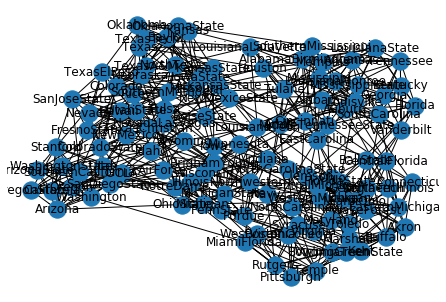

11 [{'Connecticut', 'Akron', 'Ohio', 'Marshall', 'Buffalo', 'Kent', 'BowlingGreenState', 'MiamiOhio'}, {'Rutgers', 'Pittsburgh', 'WestVirginia', 'Syracuse', 'NotreDame', 'VirginiaTech', 'Temple', 'BostonCollege', 'MiamiFlorida', 'Navy'}, {'Wyoming', 'SanDiegoState', 'NevadaLasVegas', 'BrighamYoung', 'ColoradoState', 'NewMexico', 'Utah', 'AirForce'}, {'Iowa', 'Wisconsin', 'Minnesota', 'Indiana', 'OhioState', 'Northwestern', 'Purdue', 'PennState', 'MichiganState', 'Michigan', 'Illinois'}, {'Missouri', 'Baylor', 'KansasState', 'Oklahoma', 'TexasTech', 'Texas', 'OklahomaState', 'IowaState', 'Nebraska', 'Colorado', 'TexasA&M', 'Kansas'}, {'NorthCarolinaState', 'Virginia', 'NorthCarolina', 'Duke', 'WakeForest', 'Maryland', 'FloridaState', 'GeorgiaTech', 'Clemson'}, {'Washington', 'UCLA', 'WashingtonState', 'Oregon', 'Arizona', 'ArizonaState', 'Stanford', 'UtahState', 'SouthernCalifornia', 'NewMexicoState', 'California', 'ArkansasState', 'Idaho', 'OregonState', 'BoiseState', 'NorthTexas'}, {'

In [17]:
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt

# 数据加载
G = nx.read_gml('./LPA/football.gml')
# 可视化
nx.draw(G, with_labels=True)
plt.show()
# 社区发现
communities = list(community.label_propagation_communities(G))
print(len(communities),communities)
print(type(communities[0]))

### 图论工具igraph

+ 可以处理百万级节点的网络
+ NetworkX比igraph好用
+ igraph比NetworkX强大

```

```

In [19]:
import igraph
G = igraph.Graph.Read_GML('./LPA/football.gml')
igraph.plot(G)
print(G.community_label_propagation())

ModuleNotFoundError: No module named 'igraph'